<a href="https://colab.research.google.com/github/KILjungjoon/Project_Korean/blob/main/beta%EC%99%80similarity%EA%B8%B0%EC%B4%88%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

---
* (삽입코드) 판다스 프로파일링으로 내용어 cor.mc_new.txt 파일 확인

In [24]:
rawtext=pd.read_csv("/content/drive/MyDrive/KoreanProject/data/cor.mc_new.txt", 
                    sep = "\t", engine='python', encoding = "utf-8", header=None)
rawtext.columns=['words']
rawtext

,words
0,카오스 이론01 자연01 보다 새롭다 시각04 최근 과학 새롭다 변혁 일어나다
1,상대04 이론01 양자05 이어 세기03 현대 중요하다 업적 간주02 카오스 이론0...
2,사실 카오스 관하다02 연구03 세계03 매우 활발히 진행02
3,그리고 다소 늦다 나라 최근 카오스 이론01 전문가 및 연구자 수26 빠르다 속도0...
4,카오스 이론01 특정 과학 혹은 특수02 현상04 연구03 국한01 이론01 분야 과학
...,...
692308,만약 슬프다 열대04 거론 더 하다 말01 잊다 모르다
692309,재미 도발 민족지 적어도 한때 공쿨 후보감 거명 지나치다 사치 되다01
692310,물론 평자 스스로 독립 민족지 내지 민속지 내보다 마음01 편하다 소리01 하다 모르다
692311,그러나 기왕 교수06 심혈01 기울이다 업적 같다 욕심 부리다02 헤아리다 하다 바라다


In [25]:
# 고빈도어를 내림차순 정렬
from collections import Counter
# Flatten the list of words
words = [word for line in rawtext['words'] for word in line.split()]

# Count the frequency of each word
counter = Counter(words)

# Get the 10 most frequent words and sort them in descending order
most_common_words = counter.most_common(10)
most_common_words = sorted(most_common_words, key=lambda x: x[1], reverse=True)

print(most_common_words)

[('하다', 122013), ('있다', 109642), ('되다01', 64651), ('없다', 60786), ('말01', 52545), ('사람', 45289), ('때01', 34173), ('보다01', 32319), ('같다', 30714), ('대하다02', 28477)]


In [27]:
# 고유값의 수 = 669066 종의 내용어 
print(rawtext['words'].nunique())    # profiling의 Distinct

# 값별 수
print(rawtext['words'].value_counts())

669066
그렇다                                                                         657
말01                                                                         400
알다                                                                          388
하다                                                                          235
보다01                                                                        207
                                                                           ... 
좋다 글 많이 쓰다01 악수06 나누다 때쯤 가지런하다 이빨 하얗다 드러내다 말01 꺼내다 목소리 생각01 크다 남자02 같다        1
가다 그때 쯤x02 되다01 우선 모자라다 잠01 보충 위하다01 전기담요 켜다01 자리01 눕다01                      1
창문 비치다01 밝다 빛 자신01 심장02 울리다01 고동06 숨소리 들리다03 고요01                             1
속01 잠기다02 잡다하다 번잡 그림자 같다 많다 꿈01 꾸다01 저녁 잠01 자다01                              1
교수06 민족지 간행01 계기 삼다 방면 논의02 그리고 논란 보다 더 본격적 활발하다 바라다 충정04 무속지 출간 진실로 반기다      1
Name: words, Length: 669066, dtype: int64


In [13]:
from pandas_profiling import ProfileReport
profile = ProfileReport(rawtext)
profile.to_notebook_iframe()

<ipython-input-13-9c94fb7748fe>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/KoreanProject/가공data/result/sg5win100vec2min_result.csv')
df=data.copy()

# 수식을 만들어 z-score로 표준화하기(StandardScaler)
df[["beta", "similarity"]] = (data[["beta", "similarity"]] - data[["beta", "similarity"]].mean())/data[["beta", "similarity"]].std()
df

,head.의미어,tail.의미어,beta,similarity
0,트럭,짐차,-0.164120,-0.084572
1,천국01,천당,1.141838,0.591029
2,고기01,물고기,-2.340018,1.023195
3,자전06,자서전,-0.994780,1.383875
4,무05,무녀01,-1.774809,-0.806992
...,...,...,...,...
22544,인명01,명자01,-0.586148,-0.990718
22545,인쇄물,영인본,0.091976,-0.647354
22546,인용02,원용,-0.431733,-0.127454
22547,일파,낭만파,-0.128811,-0.094772


In [ ]:
print(data.describe())
print(df.describe())

               beta    similarity
count  22549.000000  22549.000000
mean       3.112979      0.671251
std        0.540826      0.108225
min        1.732568      0.500004
25%        2.704859      0.579729
50%        3.067416      0.662055
75%        3.471021      0.753513
max        5.208544      0.980429
               beta    similarity
count  2.254900e+04  2.254900e+04
mean  -9.957493e-16  2.268796e-16
std    1.000000e+00  1.000000e+00
min   -2.552414e+00 -1.582334e+00
25%   -7.546247e-01 -8.456655e-01
50%   -8.424657e-02 -8.497165e-02
75%    6.620279e-01  7.601020e-01
max    3.874751e+00  2.856821e+00


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


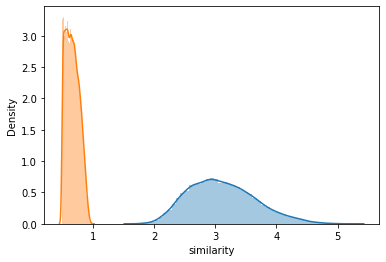

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


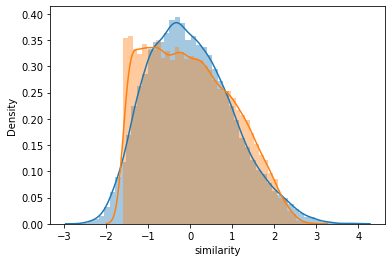

In [ ]:
# 다시 히스토그램으로 분포를 비교하기
import seaborn as sns
sns.distplot(data["beta"])
sns.distplot(data["similarity"])
a=plt.show()
sns.distplot(df["beta"])
sns.distplot(df["similarity"])
a=plt.show()

In [ ]:
# https://wotres.tistory.com/entry/z-score-scaling-%ED%95%98%EB%8A%94%EB%B2%95-in-python
# sklearn 라이브러리로 z-score 계산
scaler = StandardScaler()
scaler.fit(data[["beta", "similarity"]])
df_scaler=data.copy()
# z-score scaling 수행 결과
pd.DataFrame(scaler.transform(data[["beta", "similarity"]]))

,0,1
0,-0.164124,-0.084574
1,1.141863,0.591042
2,-2.340070,1.023218
3,-0.994802,1.383906
4,-1.774848,-0.807010
...,...,...
22544,-0.586161,-0.990740
22545,0.091978,-0.647369
22546,-0.431742,-0.127457
22547,-0.128814,-0.094774


* pandas profiling으로 검사하기

In [1]:
# 실행 후 run time 다시 실행, 그리고 다시 실행
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 33.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=249e82156dd3e0502068d379f4161c02e3617334d05df2159858df7b43ee5301
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempti

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_notebook_iframe()

<ipython-input-6-7ec4a88290c3>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* 상관계수 https://mindscale.kr/course/basic-stat-python/8/

In [ ]:
# 피어슨 상관 계수
correlation, _ = np.corrcoef(df['beta'], df['similarity'])
print("Pearson correlation: ", correlation)

Pearson correlation:  [1.        0.1560916]


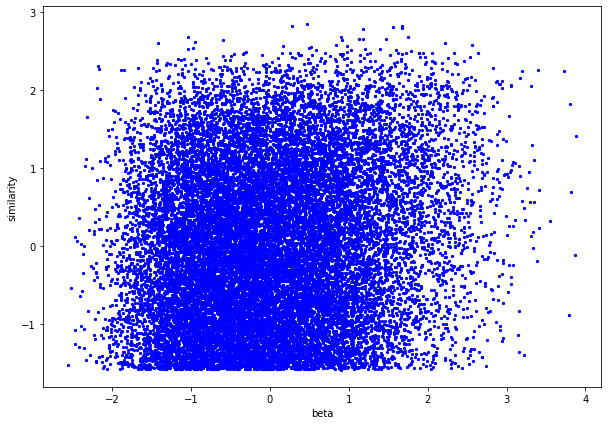

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(df["beta"], df["similarity"],color='b',s=5)
plt.xlabel("beta")
plt.ylabel("similarity")
plt.show()

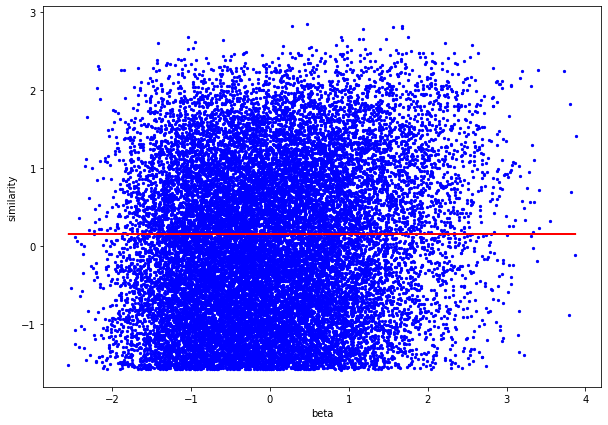

In [ ]:
fig = plt.figure(figsize=(10, 7))
fig.set_facecolor('white')

b0, b1 = np.polyfit(df['beta'], df['similarity'], 1)
plt.scatter(df['beta'], df['similarity'],color='b',s=5)
plt.plot(df['beta'],b0+b1*df['beta'],color='red')
plt.xlabel("beta")
plt.ylabel("similarity")
plt.show()

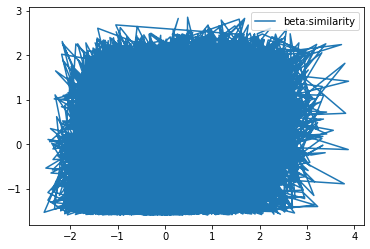

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the line charts
plt.plot(df['beta'], df['similarity'], label='beta:similarity')

# Adding a legend
plt.legend()

# Showing the plot
plt.show()

## 선형적인 관계가 전혀 없으므로 스피어만 상관계수를 사용하는 것이 적절

In [ ]:
# 스피어만 상관계수
import scipy.stats
scipy.stats.spearmanr(df["beta"], df["similarity"]).correlation

0.13817823161480233

*kendall의 tau</p>
spearman의 상관계수와 마찬가지로, 비선형적 관게이거나 서열변수일 때 사용</p>
spearman의 상관계수보다 믿을만 한 것으로 알려짐 (특히 표본이 작을 때)

In [ ]:
# Kendall 상관계수
scipy.stats.kendalltau(df["beta"], df["similarity"]).correlation

0.09230530202590113

---
---
# RMSE와 RMSSE 계산

In [ ]:
# RMSE 계산
import pandas as pd
import math
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(df["beta"], df["similarity"],squared=False)   # squared=False 또는 
mse = mean_squared_error(df["beta"], df["similarity"])
rmse_2 = mse ** 0.5    # 즉 sqrt(mse)
print('rmse',rmse)
print('rmse',rmse_2)
print('rmse',math.sqrt(mse))   # np.sqrt도 동일

rmse 1.2991312276328248
rmse 1.2991312276328248
rmse 1.2991312276328248


### RMSSE : </p>
- 시계열 데이터에 대한 평가법이므로 우리 데이터에는 적절치 않음. </p>
- 이론적으로 공식의 인자가 부족하므로 부적절.

In [ ]:
beta_array = np.array(df["beta"])
similarity_array = np.array(df["similarity"])

In [ ]:
# 활용 코드 https://pseudo-lab.github.io/Tutorial-Book/chapters/time-series/Ch1-Time-Series.html 
# RMSSE는 실제값, 예측값, 훈련값 3개의 인자가 필요
def RMSSE(true, pred): 

    n = len(pred)

    numerator = np.mean(np.sum(np.square(true - pred)))
    
    denominator = 1/(n-1)*np.sum(np.square((pred[1:] - pred[:-1])))
    
    msse = numerator/denominator
    
    return msse ** 0.5

In [ ]:
print(RMSSE(beta_array, similarity_array))

144.53872423106407
